<a href="https://colab.research.google.com/github/AntoninaRemizova/MMAD/blob/main/%D0%9C%D0%9C%D0%90%D0%94_%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/AntoninaRemizova/MMAD/main/dataset1.xlsx"
data = pd.read_excel(url)
data

,№,X1,X2,X3,X4,Y
0,1,8,1,15,6,282
1,2,7,18,0,19,181
2,3,3,5,15,2,60
3,4,16,12,14,2,454
4,5,12,6,1,10,283
...,...,...,...,...,...,...
145,146,8,6,9,4,54
146,147,10,2,9,1,71
147,148,17,9,2,9,67
148,149,2,18,18,14,131


# Определение показателей и конфигурации графиков

In [3]:
columns = ['X1', 'X2', 'X3', 'X4', 'Y']
plot_config = {
    'X1': {'title': 'Число работников', 'ylabel': 'Шт.'},
    'X2': {'title': 'Фонд заработной платы', 'ylabel': 'Тыс. у.е.'},
    'X3': {'title': 'Число контрагентов', 'ylabel': 'Шт.'},
    'X4': {'title': 'Число заключенных контрактов', 'ylabel': 'Шт.'},
    'Y': {'title': 'Прибыль организации', 'ylabel': 'Млн. у.е.'}
}

# Проверка пустых значений

In [4]:
print("Количество пропущенных значений:")
print(data[columns].isnull().sum().to_string())

Количество пропущенных значений:
X1    0
X2    0
X3    0
X4    0
Y     0


# Предварительный расчет статистик для каждого показателя

# Описательная статистика

In [5]:
stats_data = {}
for col in columns:
    col_data = data[col].dropna()
    stats_data[col] = {
        'values': col_data.values, # исходные значения (без пропусков)
        'mean': np.mean(col_data), # среднее арифметическое
        'median': np.median(col_data), # медиана
        'std': np.std(col_data), # стандартное отклонение
        'var': np.var(col_data), # дисперсия
        'min': np.min(col_data), # минимальное значение
        'max': np.max(col_data), # максимальное значение
        'ptp': np.ptp(col_data), # размах вариации (x_max - x_min)
        'q1': np.quantile(col_data, 0.25), # первый квартиль
        'q3': np.quantile(col_data, 0.75), # третий квартиль
        'iqr': np.quantile(col_data, 0.75) - np.quantile(col_data, 0.25), # межквартильный размах
        'gmean': stats.gmean(col_data), # среднее геометрическое
        'rms': np.sqrt(np.mean(col_data**2)), # среднее квадратическое
        'size': len(col_data) # количество наблюдений (без пропусков)
    }

## Числовые значения

In [6]:
results = pd.DataFrame({
    col: [
        stats_data[col]['size'],
        stats_data[col]['mean'],
        stats_data[col]['rms'],
        stats_data[col]['gmean'],
        stats_data[col]['median'],
        stats_data[col]['var'],
        stats_data[col]['std'],
        stats_data[col]['ptp'],
        stats_data[col]['min'],
        stats_data[col]['max']
    ] for col in columns
}, index=['Размер датасета', 'Среднее арифметическое', 'Среднее квадратическое',
          'Среднее геометрическое', 'Медиана', 'Дисперсия', 'Стандартное отклонение',
          'Размах вариации', 'Минимум', 'Максимум']).round(3)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

print("Описательная статистика".center(80))
print(results.to_string())

                            Описательная статистика                             
                          X1       X2       X3       X4         Y    
Размер датасета         150.000  150.000  150.000  150.000    150.000
Среднее арифметическое   10.233   10.620    9.987   10.013    211.733
Среднее квадратическое   11.610   12.120   11.655   11.467    266.702
Среднее геометрическое    0.000    0.000    0.000    0.000    160.354
Медиана                  10.000   11.000   10.000   10.000    135.500
Дисперсия                30.072   34.116   36.106   31.226  26298.769
Стандартное отклонение    5.484    5.841    6.009    5.588    162.169
Размах вариации          20.000   20.000   20.000   20.000    619.000
Минимум                   0.000    0.000    0.000    0.000     39.000
Максимум                 20.000   20.000   20.000   20.000    658.000


## Boxplots

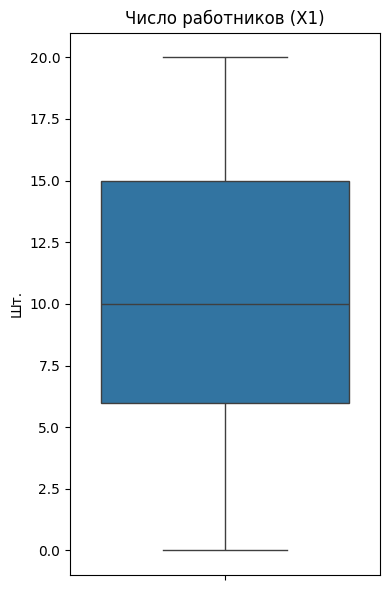

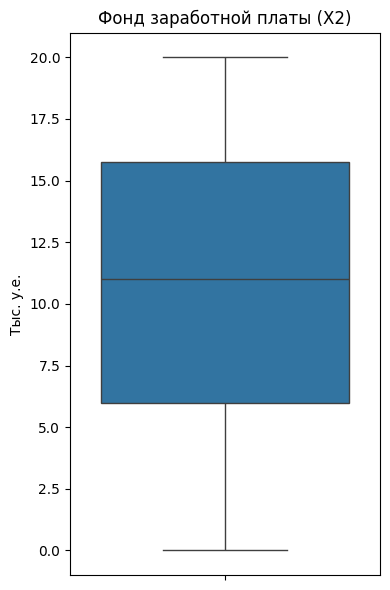

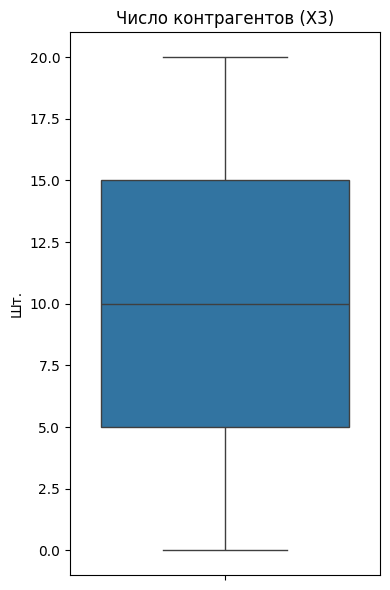

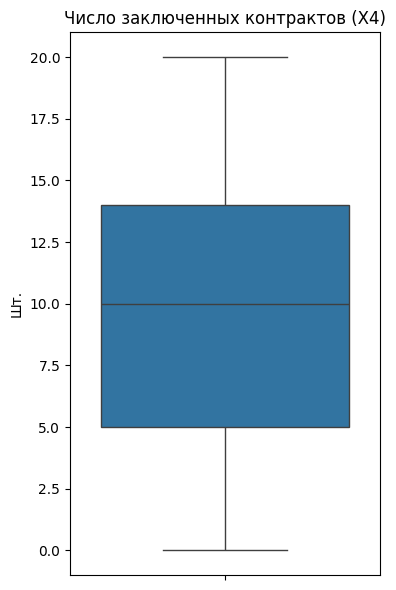

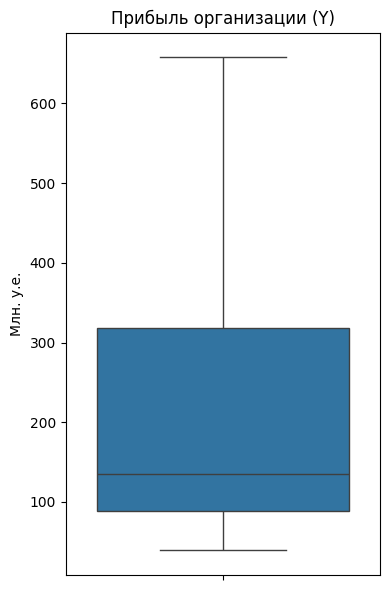

In [7]:
for col in columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(data=data[col])
    plt.title(f"{plot_config[col]['title']} ({col})")
    plt.xticks(rotation=45)
    plt.ylabel(plot_config[col]["ylabel"])
    plt.tight_layout()
    plt.show()
    print("")

# Проверка данных на случайность

## Метод медианы


Число работников (X1):
Медиана: 10.0
Выше медианы: 69 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 10 наблюдений
Число серий (a_оп): 66
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


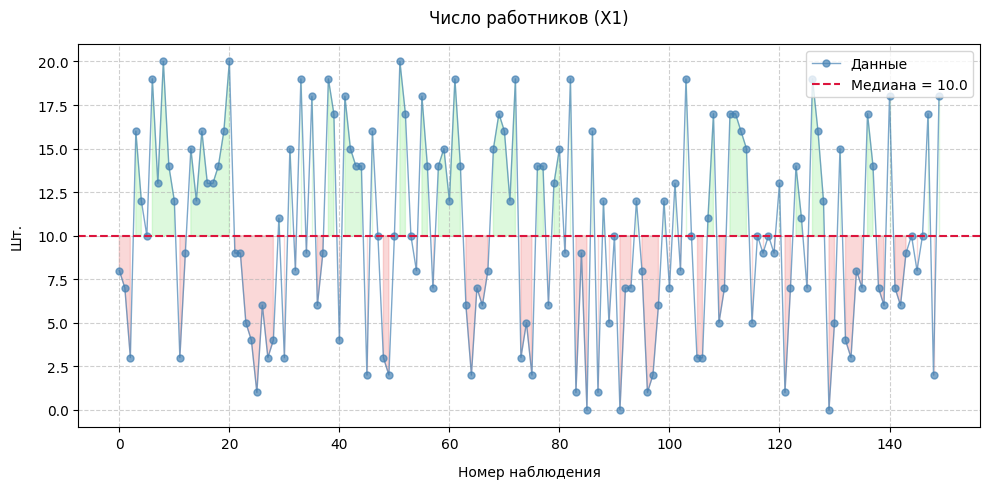


Фонд заработной платы (X2):
Медиана: 11.0
Выше медианы: 70 наблюдений
Ниже медианы: 71 наблюдений
Равно медиане: 9 наблюдений
Число серий (a_оп): 79
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


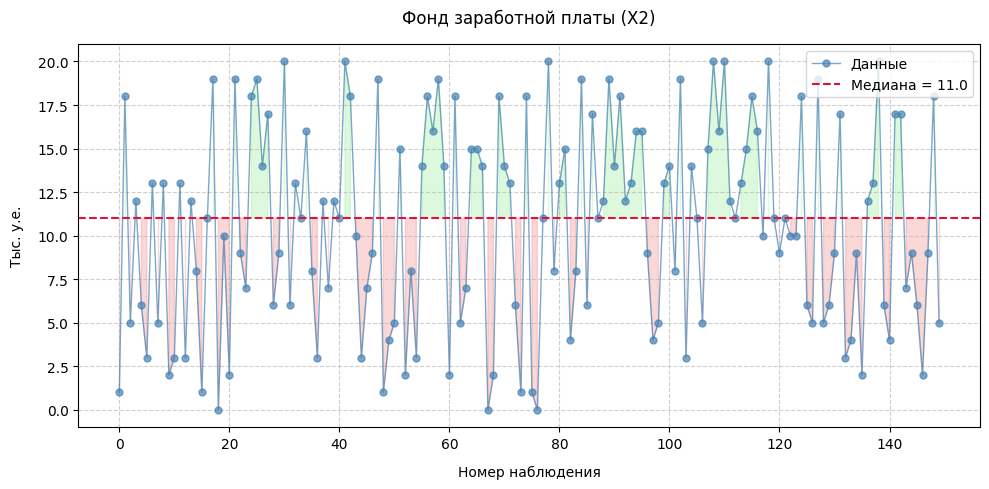


Число контрагентов (X3):
Медиана: 10.0
Выше медианы: 73 наблюдений
Ниже медианы: 70 наблюдений
Равно медиане: 7 наблюдений
Число серий (a_оп): 75
Самая длинная серия (b_оп): 7
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


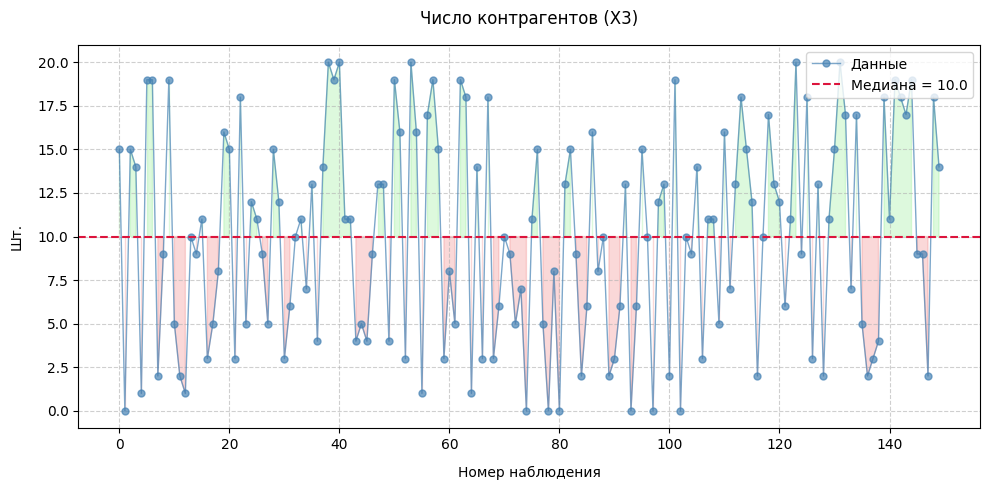


Число заключенных контрактов (X4):
Медиана: 10.0
Выше медианы: 71 наблюдений
Ниже медианы: 68 наблюдений
Равно медиане: 11 наблюдений
Число серий (a_оп): 77
Самая длинная серия (b_оп): 8
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


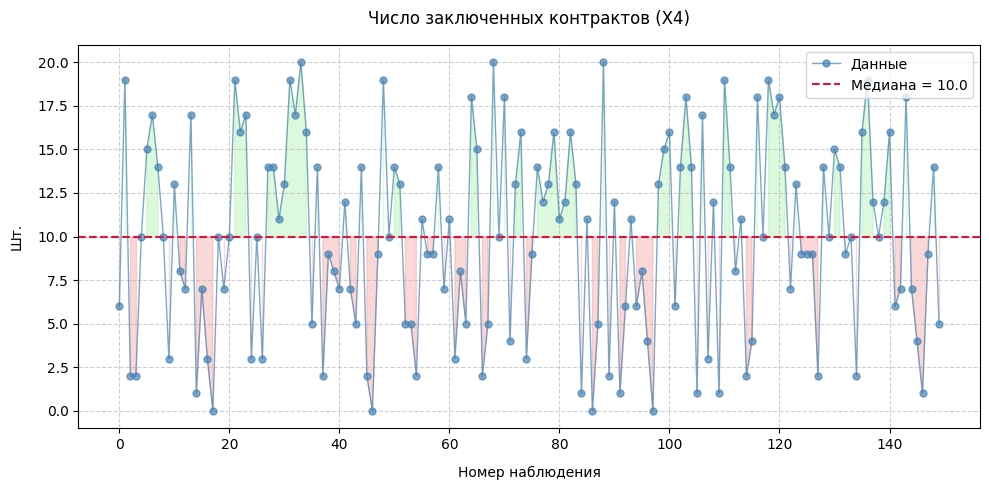


Прибыль организации (Y):
Медиана: 135.5
Выше медианы: 75 наблюдений
Ниже медианы: 75 наблюдений
Равно медиане: 0 наблюдений
Число серий (a_оп): 56
Самая длинная серия (b_оп): 10
Критическое число серий (a_кр): 51
Критическая длина серий (b_кр): 17
Вывод: Данные случайны
 


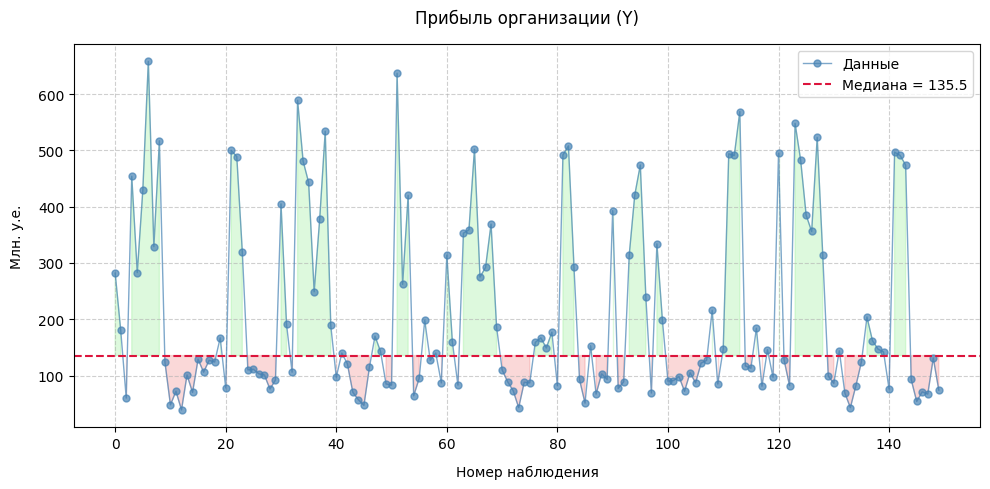

In [8]:
def check_randomness(series_values, median):
    signs = ['+' if x > median else '-' for x in series_values]

    # количество серий
    a_obs = 1
    for i in range(1, len(signs)):
        if signs[i] != signs[i-1]:
            a_obs += 1

    # длина самой длинной серии
    b_obs = 1
    current_length = 1
    for i in range(1, len(signs)):
        if signs[i] == signs[i-1]:
            current_length += 1
            if current_length > b_obs:
                b_obs = current_length
        else:
            current_length = 1

    # критические значения
    n = len(series_values)
    a_crit = math.floor(0.5 * (n + 1) - 1.96 * math.sqrt(n - 1))
    b_crit = math.floor(3.3 * math.log(n) + 1)

    # проверяем критерии
    is_random = (a_obs > a_crit) and (b_obs < b_crit)

    return {
        'a_obs': a_obs,
        'b_obs': b_obs,
        'a_crit': a_crit,
        'b_crit': b_crit,
        'is_random': is_random,
        'above': len(series_values[series_values > median]),
        'below': len(series_values[series_values < median]),
        'equal': len(series_values[series_values == median])
    }

for col in columns:
    res = check_randomness(stats_data[col]['values'], stats_data[col]['median'])

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Медиана: {stats_data[col]['median']:.1f}")
    print(f"Выше медианы: {res['above']} наблюдений")
    print(f"Ниже медианы: {res['below']} наблюдений")
    print(f"Равно медиане: {res['equal']} наблюдений")
    print(f"Число серий (a_оп): {res['a_obs']}")
    print(f"Самая длинная серия (b_оп): {res['b_obs']}")
    print(f"Критическое число серий (a_кр): {res['a_crit']}")
    print(f"Критическая длина серий (b_кр): {res['b_crit']}")
    print(f"Вывод: {'Данные случайны' if res['is_random'] else 'Данные НЕ случайны'}")
    print(" ")

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(stats_data[col]['values'], 'o-', color='steelblue', alpha=0.7, markersize=5, linewidth=1, label='Данные')

    ax.axhline(stats_data[col]['median'], color='crimson', linestyle='--', linewidth=1.5, label=f'Медиана = {stats_data[col]["median"]:.1f}')

    ax.fill_between(range(len(stats_data[col]['values'])), stats_data[col]['median'], stats_data[col]['values'],
                    where=(stats_data[col]['values'] > stats_data[col]['median']), color='lightgreen', alpha=0.3)
    ax.fill_between(range(len(stats_data[col]['values'])), stats_data[col]['median'], stats_data[col]['values'],
                    where=(stats_data[col]['values'] < stats_data[col]['median']), color='lightcoral', alpha=0.3)

    ax.set_title(f"{plot_config[col]['title']} ({col})", pad=15)
    ax.set_xlabel('Номер наблюдения', labelpad=10)
    ax.set_ylabel(plot_config[col]["ylabel"], labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Проверка данных на выбросы

## Метод квантилей

In [9]:
def detect_outliers_iqr(values, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (values < lower_bound) | (values > upper_bound)

for col in columns:
    outliers_mask = detect_outliers_iqr(stats_data[col]['values'], stats_data[col]['q1'], stats_data[col]['q3'], stats_data[col]['iqr'])
    outliers = stats_data[col]['values'][outliers_mask]

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Q1: {stats_data[col]['q1']:.2f}")
    print(f"Q3: {stats_data[col]['q3']:.2f}")
    print(f"IQR: {stats_data[col]['iqr']:.2f}")
    print(f"Нижняя граница выбросов: {stats_data[col]['q1'] - 1.5*stats_data[col]['iqr']:.2f}")
    print(f"Верхняя граница выбросов: {stats_data[col]['q3'] + 1.5*stats_data[col]['iqr']:.2f}")

    if len(outliers) > 0:
        print(f"Количество выбросов: {len(outliers)} ({len(outliers)/stats_data[col]['size']*100:.2f}%)")
        print("Значения выбросов:", outliers)
    else:
        print("Выбросы не обнаружены.")



Число работников (X1):
Q1: 6.00
Q3: 15.00
IQR: 9.00
Нижняя граница выбросов: -7.50
Верхняя граница выбросов: 28.50
Выбросы не обнаружены.

Фонд заработной платы (X2):
Q1: 6.00
Q3: 15.75
IQR: 9.75
Нижняя граница выбросов: -8.62
Верхняя граница выбросов: 30.38
Выбросы не обнаружены.

Число контрагентов (X3):
Q1: 5.00
Q3: 15.00
IQR: 10.00
Нижняя граница выбросов: -10.00
Верхняя граница выбросов: 30.00
Выбросы не обнаружены.

Число заключенных контрактов (X4):
Q1: 5.00
Q3: 14.00
IQR: 9.00
Нижняя граница выбросов: -8.50
Верхняя граница выбросов: 27.50
Выбросы не обнаружены.

Прибыль организации (Y):
Q1: 88.25
Q3: 318.75
IQR: 230.50
Нижняя граница выбросов: -257.50
Верхняя граница выбросов: 664.50
Выбросы не обнаружены.


## Правило трех сигм


Число работников (X1):
Среднее значение (μ): 10.23
Стандартное отклонение (σ): 5.48
Нижняя граница (μ-3σ): -6.22
Верхняя граница (μ+3σ): 26.68
Количество выбросов: 0
Выбросы не обнаружены

Фонд заработной платы (X2):
Среднее значение (μ): 10.62
Стандартное отклонение (σ): 5.84
Нижняя граница (μ-3σ): -6.90
Верхняя граница (μ+3σ): 28.14
Количество выбросов: 0
Выбросы не обнаружены

Число контрагентов (X3):
Среднее значение (μ): 9.99
Стандартное отклонение (σ): 6.01
Нижняя граница (μ-3σ): -8.04
Верхняя граница (μ+3σ): 28.01
Количество выбросов: 0
Выбросы не обнаружены

Число заключенных контрактов (X4):
Среднее значение (μ): 10.01
Стандартное отклонение (σ): 5.59
Нижняя граница (μ-3σ): -6.75
Верхняя граница (μ+3σ): 26.78
Количество выбросов: 0
Выбросы не обнаружены

Прибыль организации (Y):
Среднее значение (μ): 211.73
Стандартное отклонение (σ): 162.17
Нижняя граница (μ-3σ): -274.77
Верхняя граница (μ+3σ): 698.24
Количество выбросов: 0
Выбросы не обнаружены


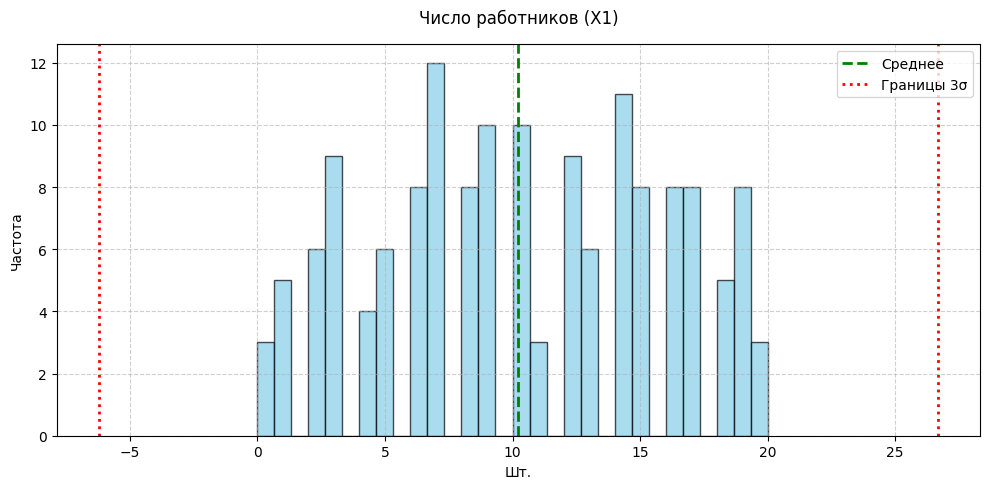

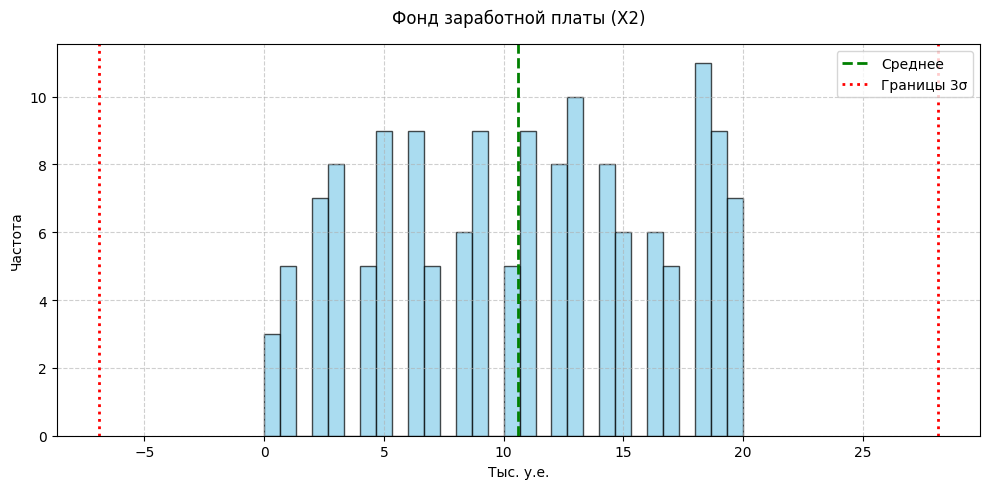

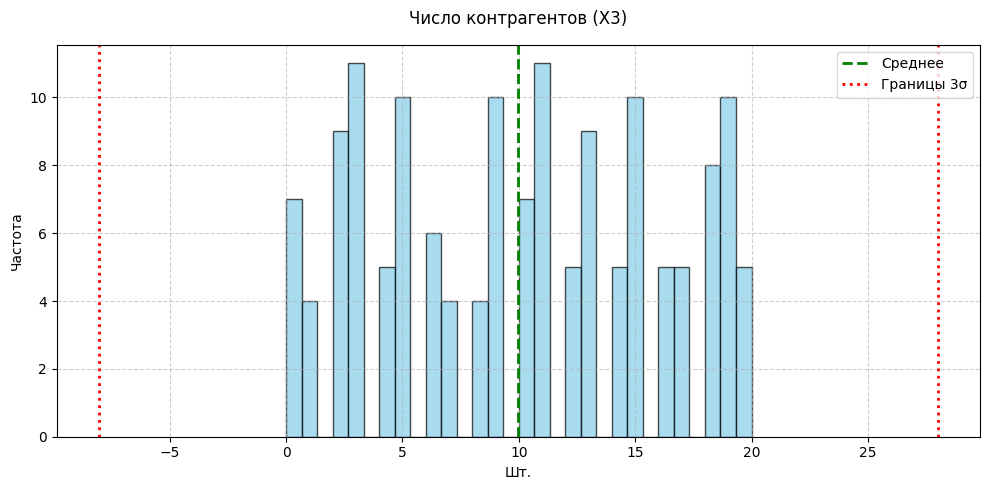

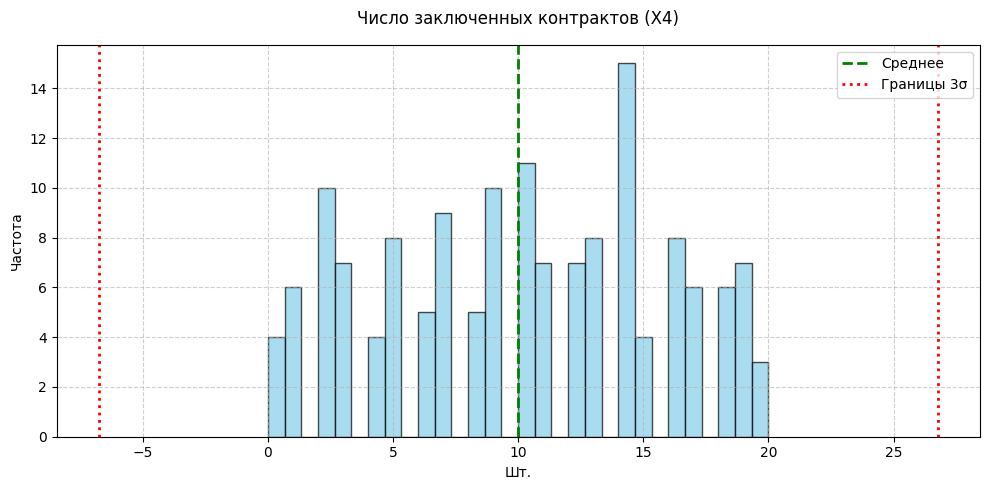

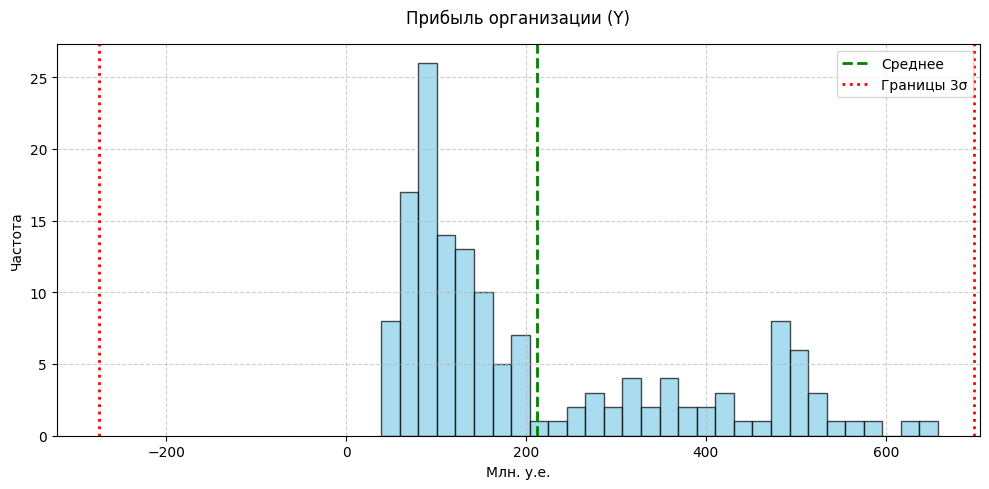

In [10]:
def detect_outliers_3sigma(values, mean, std):
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std
    return (values < lower_bound) | (values > upper_bound)

for col in columns:
    outliers_mask = detect_outliers_3sigma(stats_data[col]['values'], stats_data[col]['mean'], stats_data[col]['std'])
    outliers = stats_data[col]['values'][outliers_mask]

    print(f"\n{plot_config[col]['title']} ({col}):")
    print(f"Среднее значение (μ): {stats_data[col]['mean']:.2f}")
    print(f"Стандартное отклонение (σ): {stats_data[col]['std']:.2f}")
    print(f"Нижняя граница (μ-3σ): {stats_data[col]['mean'] - 3*stats_data[col]['std']:.2f}")
    print(f"Верхняя граница (μ+3σ): {stats_data[col]['mean'] + 3*stats_data[col]['std']:.2f}")
    print(f"Количество выбросов: {len(outliers)}")

    if len(outliers) > 0:
        print("Значения выбросов:", outliers)
    else:
        print("Выбросы не обнаружены")

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(stats_data[col]['values'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')

    mean = stats_data[col]['mean']
    std = stats_data[col]['std']
    plt.axvline(mean, color='green', linestyle='--', linewidth=2, label='Среднее')
    plt.axvline(mean - 3*std, color='red', linestyle=':', linewidth=2, label='Границы 3σ')
    plt.axvline(mean + 3*std, color='red', linestyle=':', linewidth=2)

    outliers_mask = detect_outliers_3sigma(stats_data[col]['values'], mean, std)
    outliers = stats_data[col]['values'][outliers_mask]
    for value in outliers:
        plt.axvline(value, color='orange', linestyle='-', linewidth=1.5, alpha=0.5)

    plt.title(f"{plot_config[col]['title']} ({col})", pad=15)
    plt.xlabel(plot_config[col]["ylabel"])
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("")

## Метод Граббса

In [11]:
def grubbs_test(values, alpha=0.05):
    x = values.copy()
    n = len(x)
    outliers = []

    while True:
        mean = np.mean(x)
        std = np.std(x, ddof=1)
        abs_dev = np.abs(x - mean)
        max_dev_idx = np.argmax(abs_dev)
        max_dev = abs_dev[max_dev_idx]

        t_critical = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        numerator = (n - 1) * t_critical
        denominator = np.sqrt(n * (n - 2 + t_critical ** 2))
        g_critical = numerator / denominator

        g = max_dev / std

        if g > g_critical:
            outliers.append(x[max_dev_idx])
            x = np.delete(x, max_dev_idx)
        else:
            break

    return outliers

for col in columns:
    outliers = grubbs_test(stats_data[col]['values'])
    if outliers:
        print(f"Выбросы в столбце {plot_config[col]['title']} ({col}):")
        for value in outliers:
            print(f"  Значение: {value}")
    else:
        print(f"В столбце {plot_config[col]['title']} ({col}) выбросов не обнаружено")
    print()

В столбце Число работников (X1) выбросов не обнаружено

В столбце Фонд заработной платы (X2) выбросов не обнаружено

В столбце Число контрагентов (X3) выбросов не обнаружено

В столбце Число заключенных контрактов (X4) выбросов не обнаружено

В столбце Прибыль организации (Y) выбросов не обнаружено

